# Simulated DCA Demo

In [1]:
from hyppo.tools import SIMULATIONS
from matplotlib import cm
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
import pickle

import dist_cov as dc

In [2]:
np.random.seed(7)

# DCA Feature Selection

Given a $(N \times P)$ matrix $X$ with $N$ samples and $P$ features, a $(N \times 1)$ matrix Y, and a dimensionality target $K$, select the $K$ dimensions of $X$ with the highest distance covariance to obtain $\hat{X}$. Ideally, $\hat{X}$ is the $(N \times K)$ matrix that is the best predictor of $Y$.

## nD Simulated Linear Independence Data

### Initialize Data

In [3]:
lin_sim = SIMULATIONS["linear"]
X, Y = lin_sim(100, 10, noise=True)
D_X = dc.dist_mat(X)
D_Y = dc.dist_mat(Y)
R_X = dc.re_centered_dist(D_X)
R_Y = dc.re_centered_dist(D_Y)
u = np.random.rand(X.shape[1])
u = dc.normalize_u(u)
u_norm = LA.norm(u)
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")
print(f"u: {u}")
print(f"u norm: {u_norm}")
D_u = dc.dist_mat_u(u, X)
R_X_u = dc.re_centered_dist(D_u)

X shape: (100, 10)
Y shape: (100, 1)
u: [0.41687975 0.19022512 0.00324467 0.34388146 0.39879408 0.47035651
 0.37719413 0.31567821 0.18146129 0.12896662]
u norm: 1.0000000000000002


/home/db202/anaconda3/envs/hyppo/lib/python3.9/site-packages/numba/core/typed_passes.py:331: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "dist_cov.py", line 45:
@njit(parallel=True)
def dist_mat_u(u, X):
^

  warnings.warn(errors.NumbaPerformanceWarning(msg,


### Test Function Dimension Alignment

In [4]:
du = dc.dist_cov_sq_grad(u, X, R_Y)
print(f"dvdu: {du}")
v = dc.dist_cov_sq(R_X, R_Y)
print(f"v^2: {v}")

dvdu: [-64.85819996 -31.21335341  18.10833809 -61.96256281 -13.06526253
 -64.27229458 -60.10284543 -52.01895802 -32.83257314   0.7347026 ]
v^2: 2.9315010626047187


### DCA

In [5]:
print(f"X shape: {X.shape}")
print(f"X:\n{X[:5]}")
X_reduced = dc.dca(X, Y, K=3)
print(f"X_reduced shape: {X_reduced.shape}")
print(f"X_reduced:\n{X_reduced[:5]}")

X shape: (100, 10)
X:
[[-8.47383421e-01  5.59837584e-01 -1.23181537e-01  4.46930356e-01
   9.55979024e-01  7.69917408e-02  2.24092732e-03 -8.55897733e-01
  -4.63122040e-01 -2.34998349e-04]
 [ 3.58459992e-01  6.07478072e-01 -2.38117734e-01 -8.68127306e-01
  -4.23708801e-01  8.19187055e-01 -5.73229293e-01 -9.57520764e-02
   8.62412039e-01 -9.50201545e-01]
 [ 2.01097835e-01  9.00259001e-01 -5.39394242e-01  9.69798385e-02
   8.18256750e-01 -7.33661108e-01  4.68251613e-02  5.00819718e-01
   3.38026482e-01 -6.44942805e-02]
 [-5.90301819e-01 -1.84682218e-02 -2.55230621e-01 -4.51976903e-02
  -2.68219228e-01  6.75835989e-01  5.37295013e-01 -3.72010646e-01
   1.45250665e-01 -4.47901903e-01]
 [-9.43141349e-02 -2.94043268e-01  3.14798926e-01 -2.59297834e-01
  -8.18140442e-02  4.38648245e-01 -1.74016342e-01  8.12846538e-01
  -6.39096762e-01  4.82237746e-01]]
X_reduced shape: (100, 3)
X_reduced:
[[-0.84738342  0.07699174  0.55983758]
 [ 0.35845999  0.81918706  0.60747807]
 [ 0.20109783 -0.73366111  

# DCA with Gradient-Based Learning Approach

Given a $(N \times P)$ matrix $X$ with $N$ samples and $P$ features, a $(N \times 1)$ matrix Y, and a dimensionality target $K$, use gradient descent to learn a $(P \times K)$ matrix $U$ such that $X U = \hat{X}$. $U$ is composed of $K$ learned vectors $u_i$ such that each $u_i$ maximizes distance covariance with some orthonormal basis of $X$. Ideally, $\hat{X}$ is the $(N \times K)$ matrix that is the best predictor of $Y$.

## 1D Simulated Linear Independence Data

### Plot Dataset

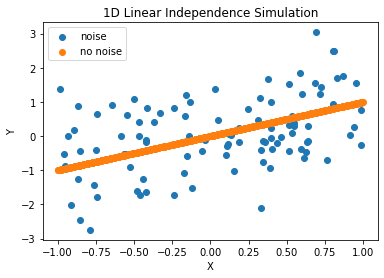

In [6]:
lin_sim = SIMULATIONS["linear"]
lin_x_n, lin_y_n = lin_sim(100, 1, noise=True)
lin_x, lin_y = lin_sim(1000, 1)
plt.scatter(lin_x_n, lin_y_n)
plt.scatter(lin_x, lin_y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("1D Linear Independence Simulation")
plt.legend(["noise", "no noise"]);

### Initialize Data

In [7]:
X, Y = lin_sim(10, 1, noise=True)
D_X = dc.dist_mat(X)
D_Y = dc.dist_mat(Y)
R_X = dc.re_centered_dist(D_X)
R_Y = dc.re_centered_dist(D_Y)
u = np.random.rand(X.shape[1])
u_normalized_norm = LA.norm(dc.normalize_u(u))
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")
print(f"u: {u}")
print(f"u norm: {u_normalized_norm}")
D_u = dc.dist_mat_u(u, X)
R_X_u = dc.re_centered_dist(D_u)

X shape: (10, 1)
Y shape: (10, 1)
u: [0.8629812]
u norm: 1.0


### Test Function Dimension Alignment

In [8]:
du = dc.dist_cov_sq_grad(u, X, R_Y)
print(f"dvdu: {du}")
v = dc.dist_cov_sq(R_X, R_Y)
print(f"v^2: {v}")

dvdu: [-16.49602347]
v^2: 1.013695989746189


### Optimize $u$

In [9]:
v_u = dc.dist_cov_sq(R_Y, R_X_u)
print(f"v^2_u: {v_u}")
u_opt, v_opt = dc.optim_u_gd(u, X, R_Y, 1e-3, 1e-5)
print(f"u opt: {u_opt}")
print(f"v^2_u_opt: {v_opt}")

v^2_u: 0.8748005820941094
u opt: [1.]
v^2_u_opt: 1.013695989746189


### Plot Gradient Ascent

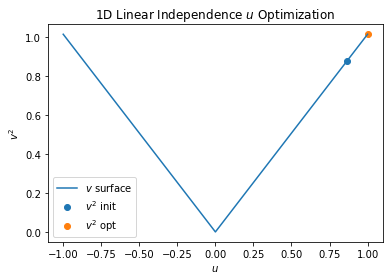

In [10]:
u_plt = np.expand_dims(np.linspace(-1, 1, 11), 1)
v_u_plt = np.zeros_like(u_plt)
for i in range(u_plt.shape[0]):
    D_u_i = dc.dist_mat_u(u_plt[i], X)
    R_X_u_i = dc.re_centered_dist(D_u_i)
    v_u_i = dc.dist_cov_sq(R_Y, R_X_u_i)
    v_u_plt[i] = v_u_i
plt.plot(u_plt, v_u_plt)
plt.scatter([u], [v_u])
plt.scatter([u_opt], [v_opt])
plt.xlabel(r"$u$")
plt.ylabel(r"$v^2$")
plt.title(r"1D Linear Independence $u$ Optimization")
plt.legend([r'$v$ surface', r'$v^2$ init', r'$v^2$ opt']);

## 2D Simulated Linear Independence Data

### Plot Dataset

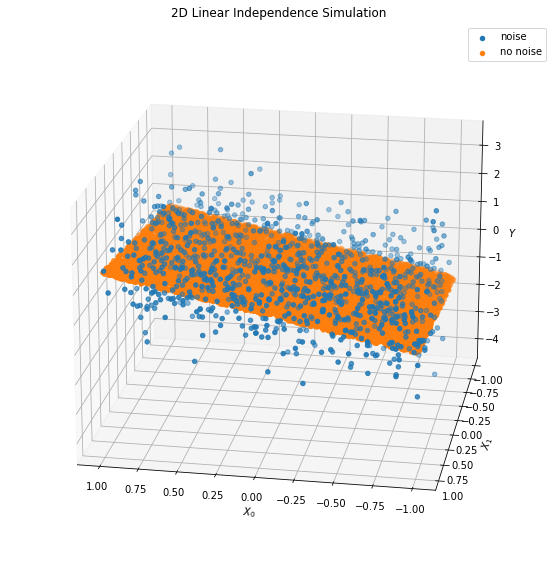

In [11]:
lin_sim = SIMULATIONS["linear"]
lin_x_n, lin_y_n = lin_sim(1000, 2, noise=True)
lin_x, lin_y = lin_sim(10000, 2)

lin_x_1_n = lin_x_n[:, 0]
lin_x_2_n = lin_x_n[:, 1]
lin_x_1 = lin_x[:, 0]
lin_x_2 = lin_x[:, 1]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(lin_x_1_n, lin_x_2_n, lin_y_n)
ax.scatter(lin_x_1, lin_x_2, lin_y)
ax.set_xlabel(r"$X_0$")
ax.set_ylabel(r"$X_1$")
ax.set_zlabel(r"$Y$")
plt.title("2D Linear Independence Simulation")
plt.legend(["noise", "no noise"])
ax.view_init(elev=20, azim=100);

### Initialize Data

In [12]:
X, Y = lin_sim(10, 2, noise=True)
D_X = dc.dist_mat(X)
D_Y = dc.dist_mat(Y)
R_X = dc.re_centered_dist(D_X)
R_Y = dc.re_centered_dist(D_Y)
u = np.random.rand(X.shape[1])
u = dc.normalize_u(u)
u_norm = LA.norm(u)
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")
print(f"u: {u}")
print(f"u norm: {u_norm}")
D_u = dc.dist_mat_u(u, X)
R_X_u = dc.re_centered_dist(D_u)

X shape: (10, 2)
Y shape: (10, 1)
u: [0.74837585 0.6632749 ]
u norm: 1.0


### Test Function Dimension Alignment

In [13]:
du = dc.dist_cov_sq_grad(u, X, R_Y)
print(f"dvdu: {du}")
v = dc.dist_cov_sq(R_X, R_Y)
print(f"v^2: {v}")

dvdu: [-7.07842632 -2.30483364]
v^2: 1.2367627477633512


### Optimize $u$

In [14]:
v_u = dc.dist_cov_sq(R_Y, R_X_u)
print(f"v^2_u: {v_u}")
u_opt, v_opt = dc.optim_u_gd(u, X, R_Y, 1e-3, 1e-5)
print(f"u opt: {u_opt}")
print(f"v^2_u_opt: {v_opt}")

v^2_u: 0.3913828137821935
u opt: [ 0.72541369 -0.68831314]
v^2_u_opt: 1.1324753407693269


### Plot Gradient Ascent

In [15]:
surf_res = 1e-1
X_surf = np.arange(-1, 1, surf_res)
Y_surf = np.arange(-1, 1, surf_res)
X_surf, Y_surf = np.meshgrid(X_surf, Y_surf)
v_u_plt = np.zeros_like(X_surf)
for i in range(X_surf.shape[0]):
    for j in range(X_surf.shape[1]):
        D_u_i = dc.dist_mat_u(np.array([X_surf[i, j], Y_surf[i, j]]), X)
        R_X_u_i = dc.re_centered_dist(D_u_i)
        v_u_i = dc.dist_cov_sq(R_Y, R_X_u_i)
        v_u_plt[i, j] = v_u_i

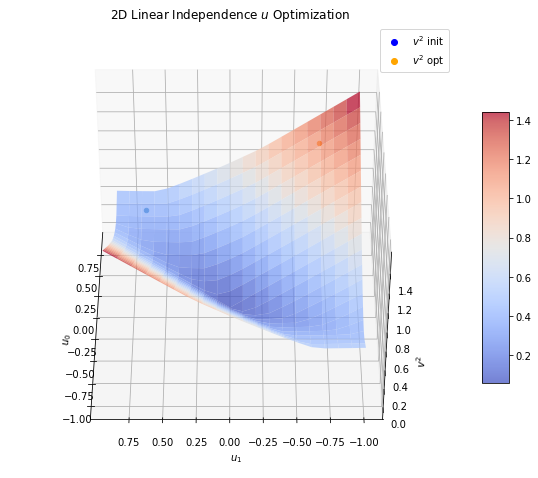

In [16]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
surf = ax.plot_surface(X_surf, Y_surf, v_u_plt, cmap=cm.coolwarm, linewidth=0, antialiased=True, alpha=.7)
ax.scatter([u[0]], [u[1]], [v_u])
ax.scatter([u_opt[0]], [u_opt[1]], [v_opt])
ax.set_xlabel(r"$u_0$")
ax.set_ylabel(r"$u_1$")
ax.set_zlabel(r"$v^2$")
ax.set_title(r"2D Linear Independence $u$ Optimization")
init_proxy = Line2D([0], [0], linestyle="none", c='blue', marker='o')
opt_proxy = Line2D([0], [0], linestyle="none", c='orange', marker='o')
ax.legend([init_proxy, opt_proxy], [r"$v^2$ init", r"$v^2$ opt"], numpoints=1)
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.view_init(elev=40, azim=180);

## nD Simulated Linear Independence Data

### Initialize Data

In [17]:
lin_sim = SIMULATIONS["linear"]
X, Y = lin_sim(100, 10, noise=True)
D_X = dc.dist_mat(X)
D_Y = dc.dist_mat(Y)
R_X = dc.re_centered_dist(D_X)
R_Y = dc.re_centered_dist(D_Y)
u = np.random.rand(X.shape[1])
u = dc.normalize_u(u)
u_norm = LA.norm(u)
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")
print(f"u: {u}")
print(f"u norm: {u_norm}")
D_u = dc.dist_mat_u(u, X)
R_X_u = dc.re_centered_dist(D_u)

X shape: (100, 10)
Y shape: (100, 1)
u: [0.18184345 0.01544137 0.23850786 0.31412451 0.37111508 0.47862501
 0.50483535 0.20349553 0.00495308 0.38474969]
u norm: 1.0


### Test Function Dimension Alignment

In [18]:
du = dc.dist_cov_sq_grad(u, X, R_Y)
print(f"dvdu: {du}")
v = dc.dist_cov_sq(R_X, R_Y)
print(f"v^2: {v}")

dvdu: [ -38.38880159   11.14724036  -67.15908032  -16.0833121   -71.66298242
  -85.05505703 -100.26350765  -58.41225416   16.85673042  -54.89348166]
v^2: 3.126115726014816


### Optimize $u$

In [19]:
v_u = dc.dist_cov_sq(R_Y, R_X_u)
print(f"v^2_u: {v_u}")
u_opt, v_opt = dc.optim_u_gd(u, X, R_Y, 1e-3, 1e-5)
print(f"u opt: {u_opt}")
print(f"v^2_u_opt: {v_opt}")

v^2_u: 0.9588038574198464
u opt: [ 0.05566547 -0.02899127  0.54334578 -0.08842427  0.30995373  0.14555218
  0.47849144  0.37438432 -0.44404418  0.09730211]
v^2_u_opt: 1.1085805884522888


### DCA

In [20]:
print(f"X shape: {X.shape}")
print(f"X:\n{X[:5]}")
U, v_dca = dc.dca_grad_learn(X, Y, K=3, lr=1e-3, epsilon=1e-5)
print(f"U shape: {U.shape}")
print(f"U:\n{U}")
print(f"v shape: {v_dca.shape}")
print(f"v: {v_dca}")
X_reduced = X @ U
print(f"X_reduced shape: {X_reduced.shape}")
print(f"X_reduced:\n{X_reduced[:5]}")

X shape: (100, 10)
X:
[[-0.11496449 -0.39673035 -0.34446833 -0.98429696 -0.79240454  0.82930607
   0.82108865 -0.63450135  0.07850965  0.97022455]
 [ 0.69417509 -0.06135703 -0.84142639 -0.46248427 -0.33512451  0.06241334
  -0.36829948 -0.34262234  0.88948479  0.73606238]
 [ 0.81583999  0.22853835  0.68717114  0.63595424  0.57870259  0.4289705
   0.45347397  0.79582656 -0.49379134  0.68964624]
 [-0.05111709  0.94219761 -0.61083191 -0.96093017  0.18775375  0.44545912
   0.22911642  0.11653846  0.08616506 -0.02568235]
 [-0.22561424  0.52194058 -0.62589391  0.37330617 -0.05480138 -0.76720374
   0.15773418  0.29664657 -0.75243777 -0.97443038]]


/home/db202/Repos/Neuro_Data_Design/hyppo/Dante-Basile_Fork/hyppo/mgc_dcorr/dist_cov.py:232: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 1d, A), array(float64, 1d, A))
  X_proj = proj_U(X_proj, U, k+1) # then inc k, unnecessary if this is last k
/home/db202/Repos/Neuro_Data_Design/hyppo/Dante-Basile_Fork/hyppo/mgc_dcorr/dist_cov.py:232: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 1d, C), array(float64, 1d, A))
  X_proj = proj_U(X_proj, U, k+1) # then inc k, unnecessary if this is last k


U shape: (10, 3)
U:
[[ 0.04491125  0.04618762  0.04759467]
 [-0.01524044 -0.01520634 -0.01259234]
 [ 0.56621733  0.5663001   0.56594056]
 [-0.03511961 -0.03224971 -0.03451633]
 [ 0.29398129  0.29408995  0.29631409]
 [ 0.11160945  0.1118597   0.11273898]
 [ 0.41135309  0.41150449  0.41232931]
 [ 0.39799677  0.40117823  0.39737532]
 [-0.49902955 -0.49610976 -0.49718745]
 [ 0.01975611  0.02221064  0.02158707]]
v shape: (3,)
v: [1.1053054  1.10528625 1.10528912]
X_reduced shape: (100, 3)
X_reduced:
[[-0.23476928 -0.23694512 -0.23442169]
 [-1.23683216 -1.23410796 -1.23304968]
 [ 1.38123152  1.38718441  1.38635519]
 [-0.12673444 -0.12885002 -0.12358312]
 [ 0.05185921  0.04878957  0.04883938]]


## Projection

In [21]:
# k_pt = 1
# X_pt = np.array([5, 1])
# X_pt = X_pt / LA.norm(X_pt)
# U_pt = np.array([1, 2])
# U_pt = U_pt / LA.norm(U_pt)
# U_pt = np.expand_dims(U_pt, 0)
# q_pt = LA.qr(U_pt[:, :k_pt])
# X_proj_pt = dc.proj_U(X_pt, U_pt, k_pt)
# print(q_pt)

In [22]:
# x_range_pt = np.linspace(0, 1, 11)
# plt.plot(X_pt[0] * x_range_pt, X_pt[1] * x_range_pt)
# plt.plot(U_pt[:, 0] * x_range_pt, U_pt[:, 1] * x_range_pt)
# plt.plot(q_pt[0] * x_range_pt, q_pt[1] * x_range_pt)
# plt.plot(X_proj_pt[0] * x_range_pt, X_proj_pt[1] * x_range_pt)
# plt.legend(["X", "U", "q", "X proj"]);

## Replicate Figure 2 from Cowley

In [23]:
def unit_vec(v):
    return v / LA.norm(v)

def vec_angle(v0, v1):
    """
    Radians
    """
    u0 = unit_vec(v0)
    u1 = unit_vec(v1)
    return np.arccos(np.clip(np.dot(u0, u1), -1., 1.))

def beta_angle(beta_hat, beta):
    """
    Mean of all beta_i vectors (P x 1)
    """
    angle = 0
    b = beta_hat.shape[1]
    for i in range(b):
        v0 = beta_hat[:, i]
        v1 = beta[:, i]
        angle += vec_angle(v0, v1)
    return angle / b

def generate_data(N, P, b, f):
    """
    N: number of samples
    P: number of features
    b: number of dimensions identified from dimensionality reduction
    f: degree of nonlinearity
    returns
        X: (N x P): (feature x sample)
        beta: (P x b), beta_i: (P x 1)
        Y: (N x b)
    """
    X = np.random.normal(size=(N, P))
    alpha = 8 * np.sqrt(P) * LA.norm(X, ord=np.inf) # normalization constant
    
    plt.figure()
    x_range_plot = np.arange(-np.pi/4, np.pi/4, .01)
    plt.plot(x_range_plot, np.sin(2 * np.pi / alpha * f * x_range_plot))
    plt.plot(x_range_plot, x_range_plot)
    plt.title(f"f: {f}, alpha: {alpha}")
    plt.legend(['data', 'linear'])
    ax = plt.gca()
    ax.set_xlim([-np.pi/4, np.pi/4])
    ax.set_ylim([-1, 1])
    plt.show()
    
    beta = np.random.normal(size=(P, b))
    beta, _ = LA.qr(beta)
    Y = np.random.normal(size=(N, b))
    for i in range(b):
        Y[:, i] = np.sin(2 * np.pi / alpha * f * X @ beta[:, i]) # (N x P) @ (P x 1) = (N x 1)
    return X, beta, Y

trial: 0


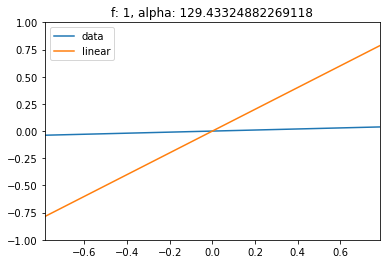

beta angle: 120.05659177912703 deg


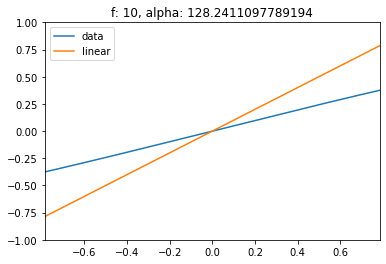

beta angle: 110.17415656317046 deg


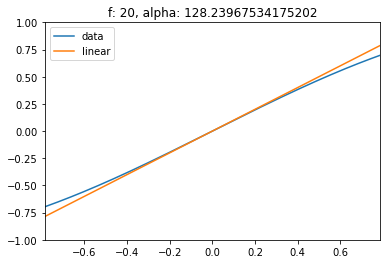

beta angle: 103.06611841565119 deg


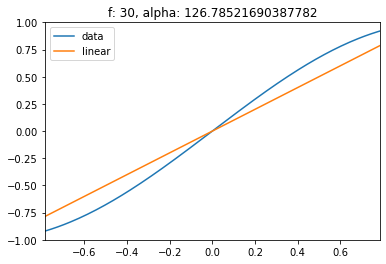

beta angle: 68.10336251140255 deg


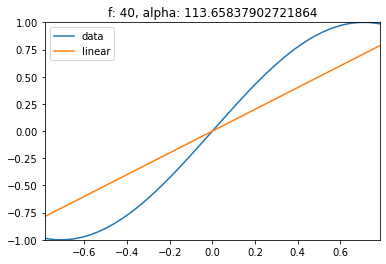

beta angle: 122.76701510513776 deg


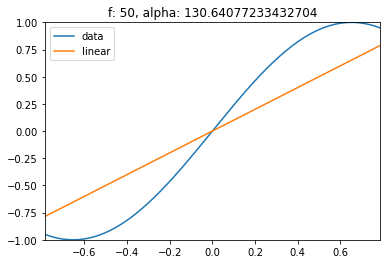

beta angle: 110.24025948212682 deg


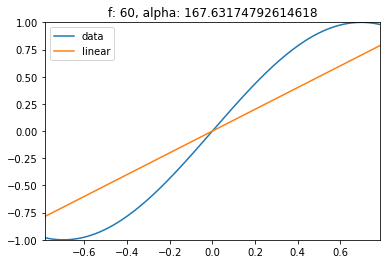

beta angle: 85.06289419867454 deg


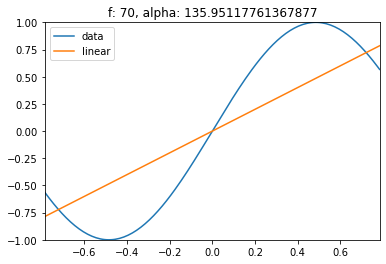

beta angle: 93.70570029843077 deg


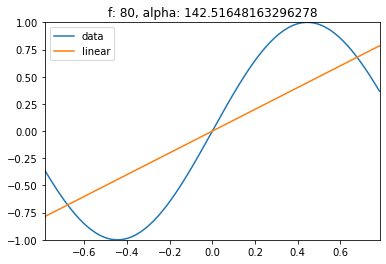

beta angle: 119.24416954047793 deg


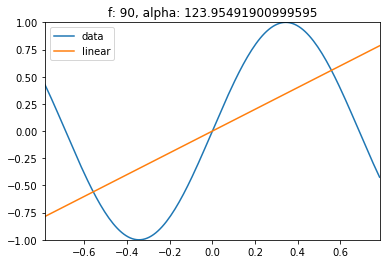

beta angle: 102.06337736950532 deg


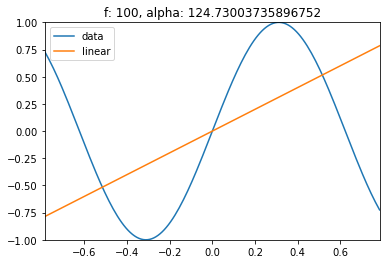

beta angle: 94.63534414714643 deg


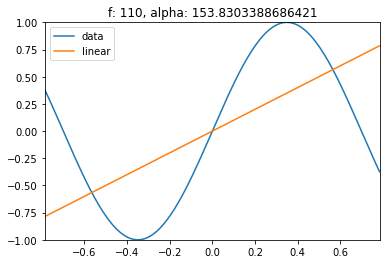

beta angle: 96.70760948101793 deg


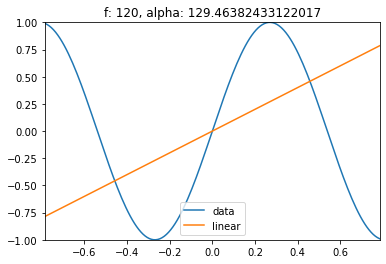

beta angle: 102.36313560565976 deg
trial: 1


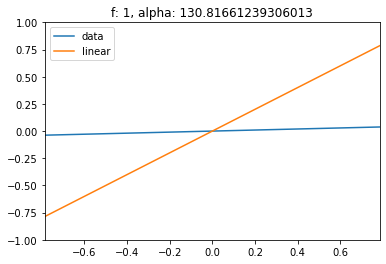

beta angle: 59.37777532582314 deg


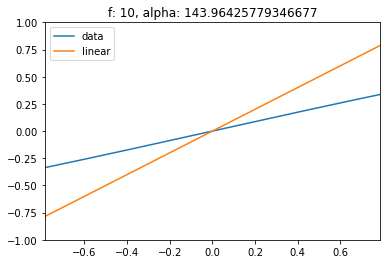

beta angle: 90.06102421065398 deg


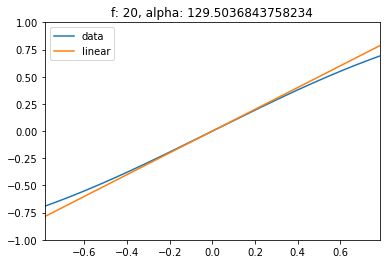

beta angle: 132.40489026287517 deg


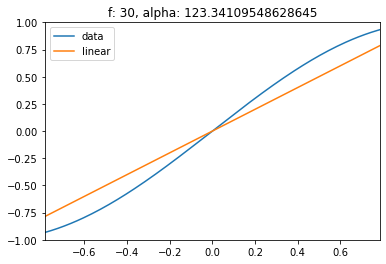

beta angle: 50.79429221618146 deg


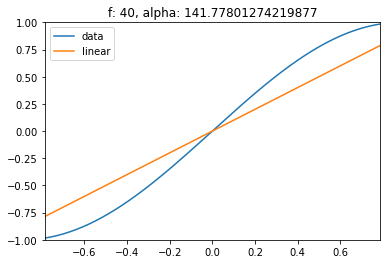

beta angle: 105.5697005039221 deg


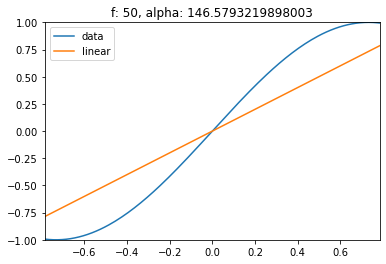

beta angle: 90.27486403797455 deg


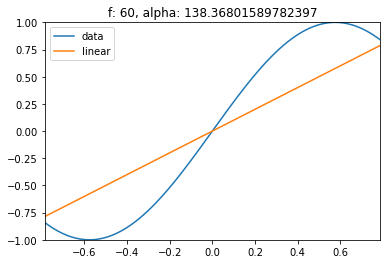

beta angle: 89.00670873262703 deg


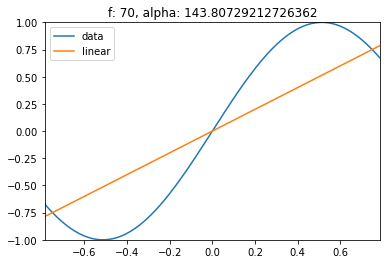

beta angle: 96.8566665006581 deg


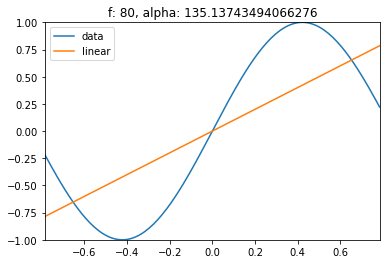

beta angle: 66.8601247527827 deg


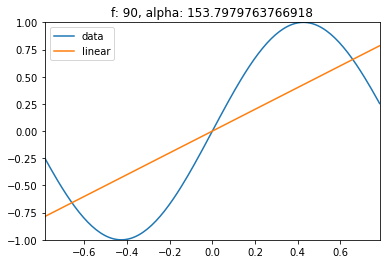

beta angle: 91.94348026206603 deg


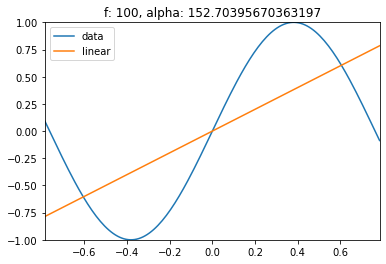

beta angle: 79.89426668491046 deg


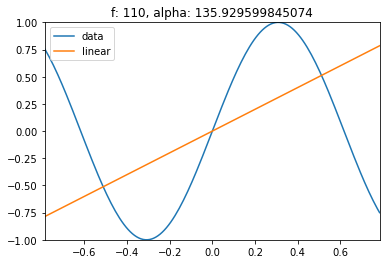

beta angle: 126.20974233829594 deg


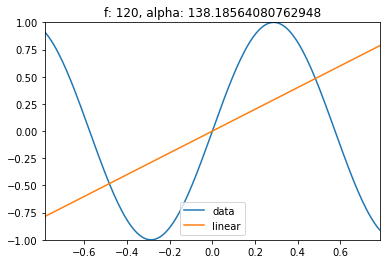

beta angle: 79.23237604641088 deg
trial: 2


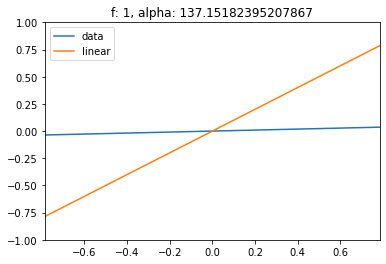

beta angle: 71.86116126607708 deg


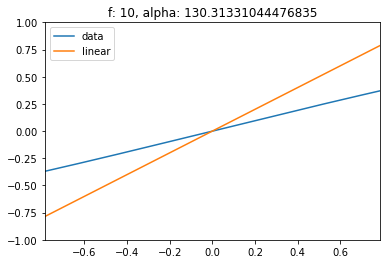

beta angle: 113.91469670118354 deg


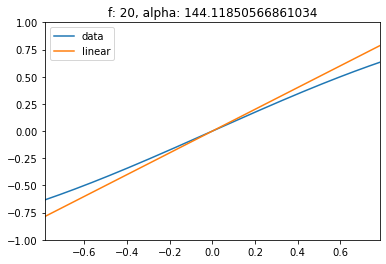

beta angle: 92.35228503894474 deg


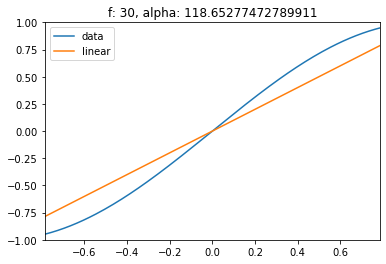

beta angle: 69.40021502285305 deg


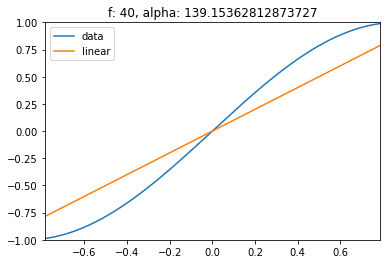

beta angle: 95.40323849265263 deg


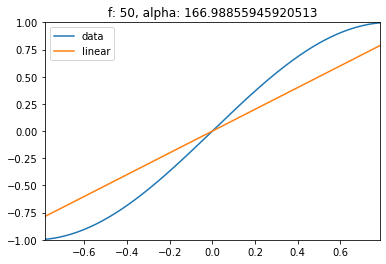

beta angle: 117.50954405840538 deg


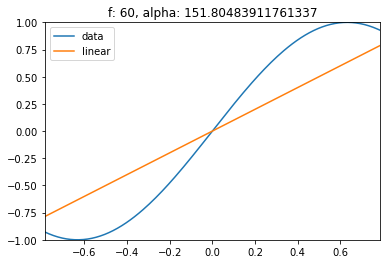

beta angle: 93.3618857227436 deg


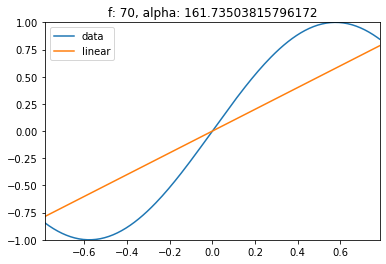

beta angle: 111.68743258036311 deg


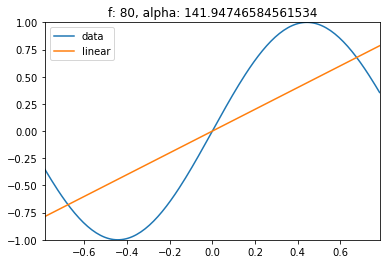

beta angle: 118.77981891159637 deg


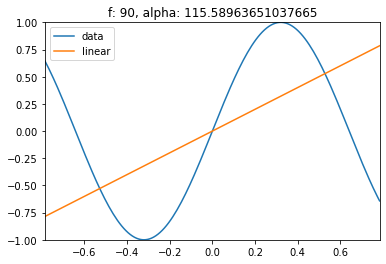

beta angle: 115.31799734111434 deg


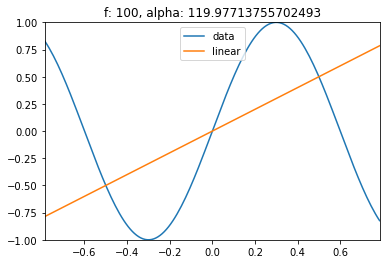

beta angle: 129.88218446745142 deg


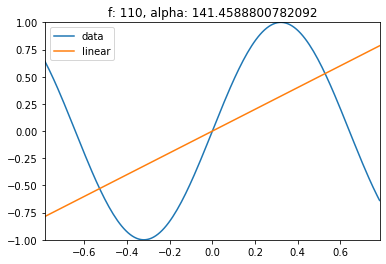

beta angle: 120.44187471099247 deg


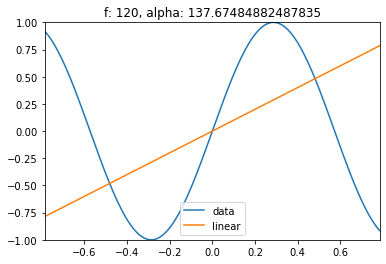

beta angle: 102.75625201176024 deg
trial: 3


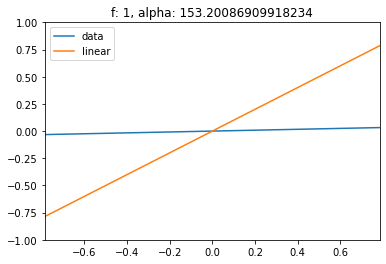

beta angle: 127.75209025629265 deg


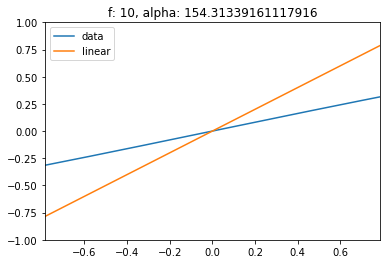

beta angle: 107.77089165538369 deg


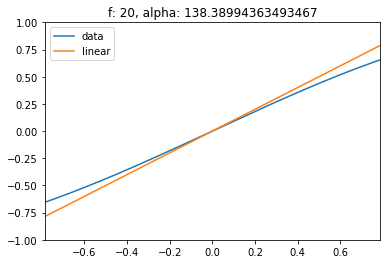

beta angle: 121.25588744816423 deg


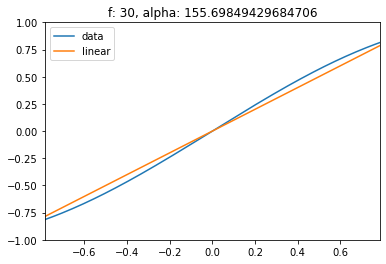

beta angle: 82.60854166886722 deg


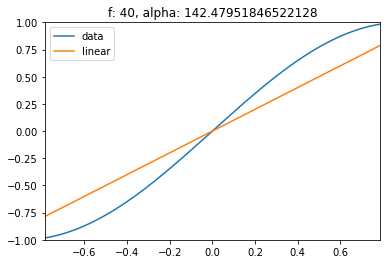

beta angle: 103.48138230006103 deg


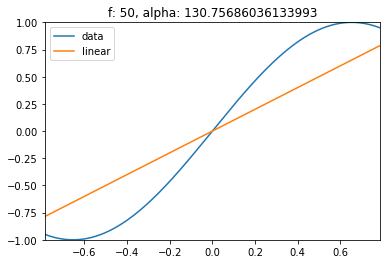

beta angle: 106.86179011517744 deg


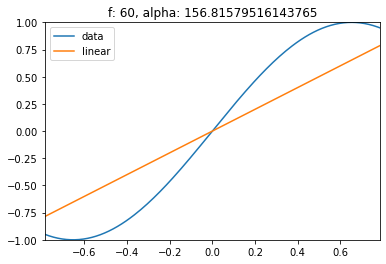

beta angle: 91.85559866502517 deg


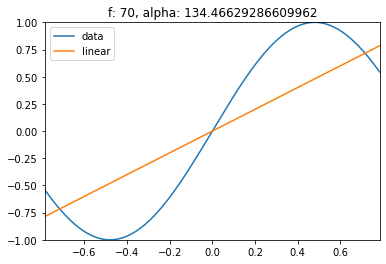

beta angle: 85.66828218871525 deg


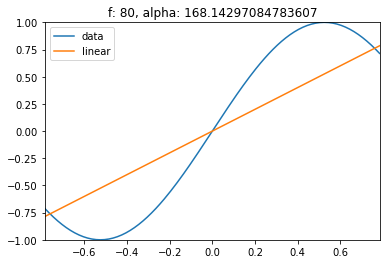

beta angle: 112.8850244029685 deg


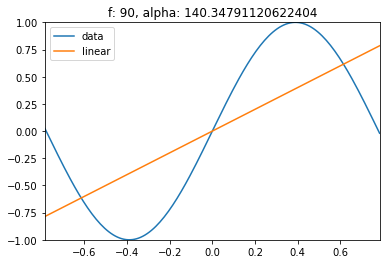

beta angle: 59.02776953312466 deg


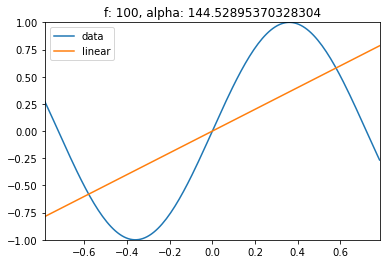

beta angle: 121.93460254363453 deg


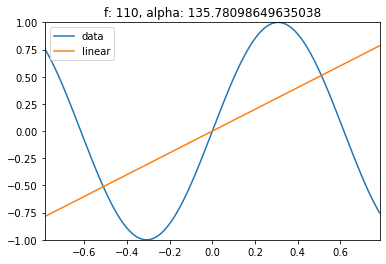

beta angle: 110.3482719232526 deg


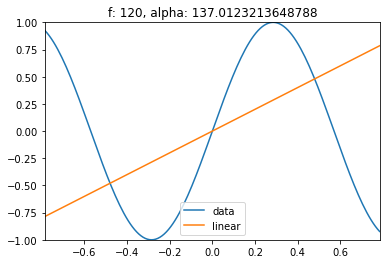

beta angle: 87.87607999762051 deg
trial: 4


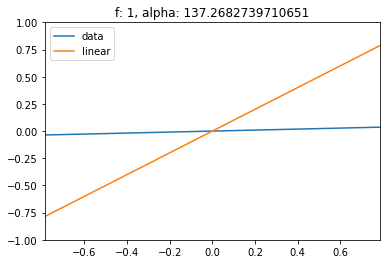

beta angle: 81.72541854918498 deg


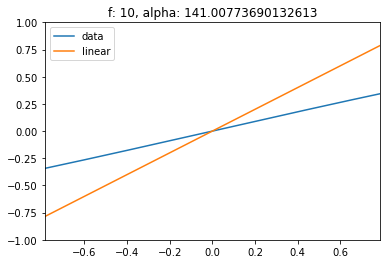

beta angle: 123.61241775164831 deg


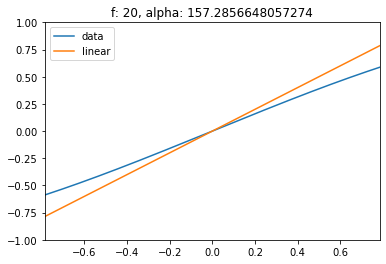

beta angle: 123.05410708413268 deg


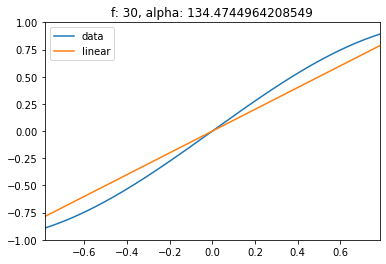

beta angle: 50.33038040770799 deg


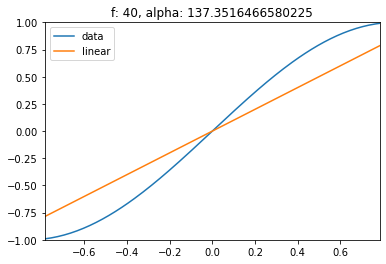

beta angle: 98.27661590956586 deg


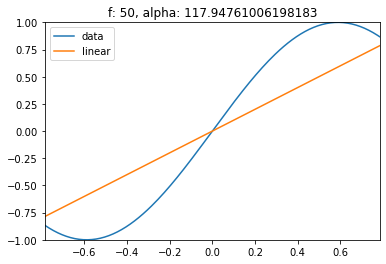

beta angle: 85.5413448463248 deg


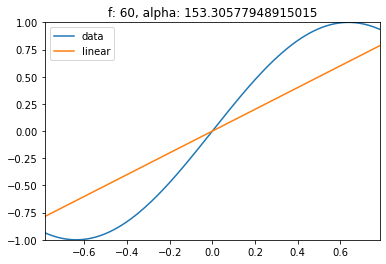

beta angle: 113.47751316305862 deg


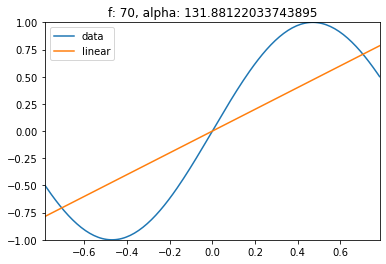

beta angle: 107.37036520966059 deg


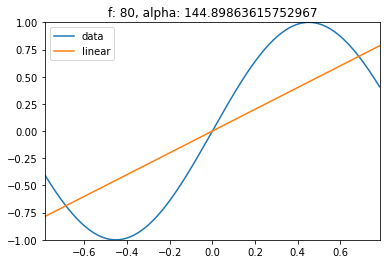

beta angle: 83.88653528047743 deg


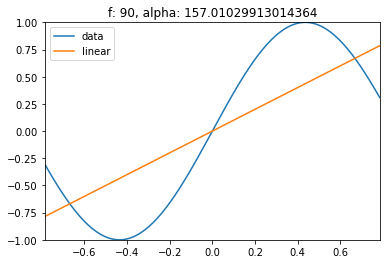

beta angle: 83.71754143839247 deg


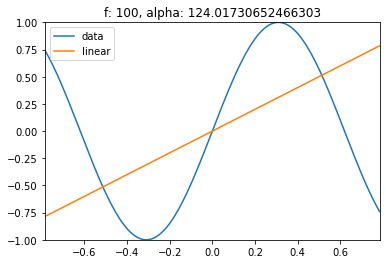

beta angle: 120.87030055332042 deg


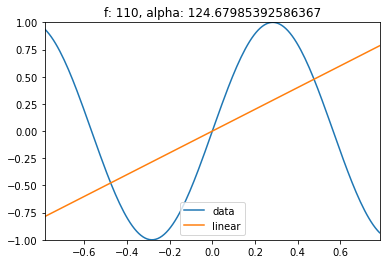

beta angle: 101.55758725935071 deg


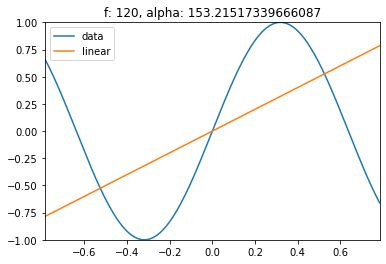

beta angle: 123.66876498142604 deg
trial: 5


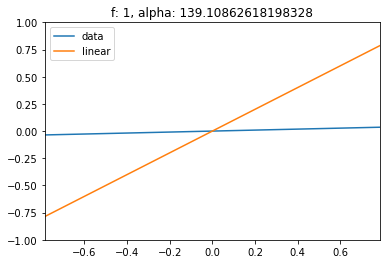

beta angle: 125.11615985908416 deg


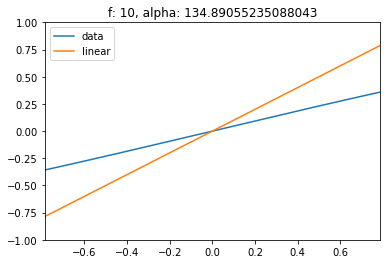

beta angle: 62.229797144179656 deg


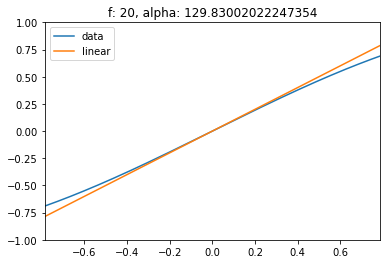

beta angle: 89.42896761267073 deg


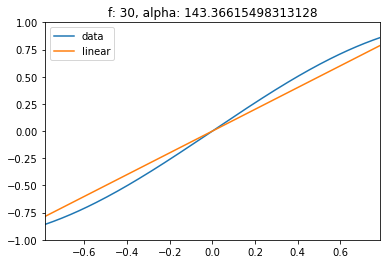

beta angle: 72.926321203212 deg


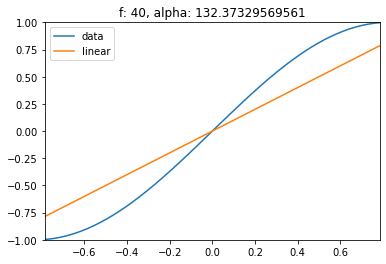

beta angle: 128.80948447985332 deg


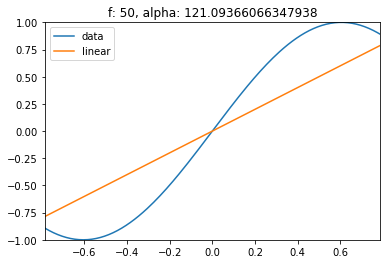

beta angle: 78.02790922257253 deg


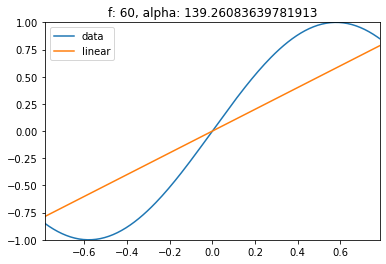

beta angle: 52.35883016778725 deg


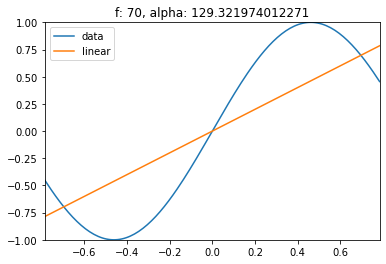

beta angle: 75.26473589302972 deg


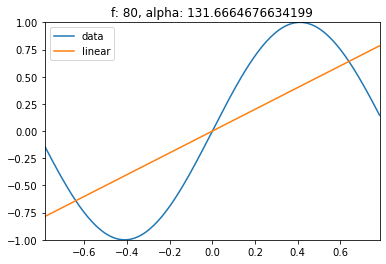

beta angle: 114.73989098893217 deg


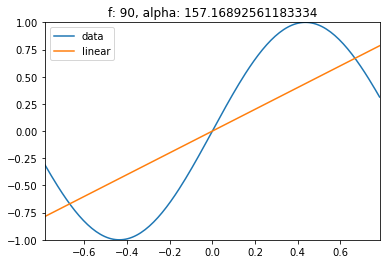

beta angle: 105.77431676906747 deg


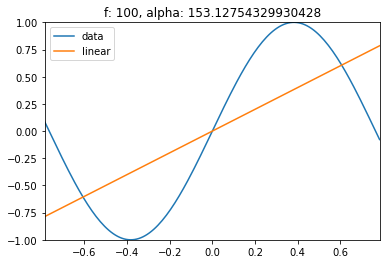

beta angle: 123.14428406620121 deg


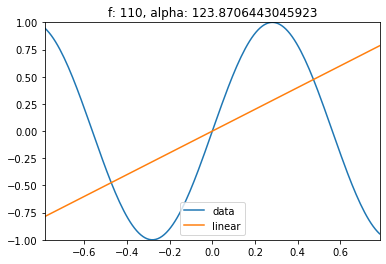

beta angle: 101.03834335806269 deg


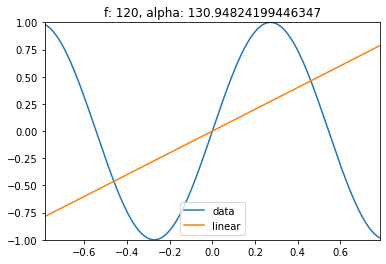

beta angle: 121.87636862345043 deg
trial: 6


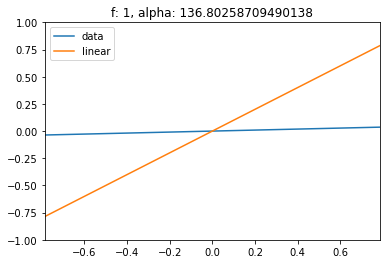

beta angle: 132.98541594191926 deg


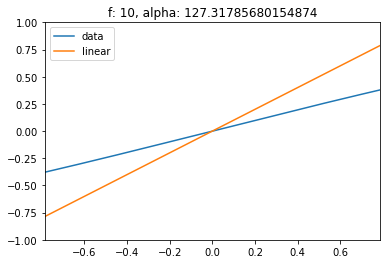

beta angle: 104.14166796106247 deg


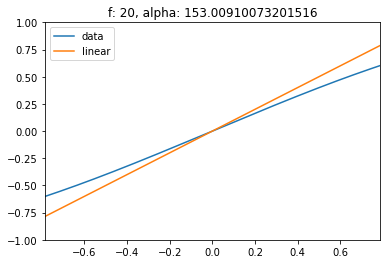

beta angle: 129.58935263503105 deg


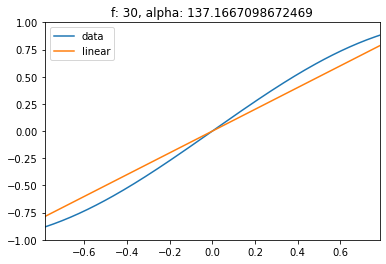

beta angle: 73.15185628706753 deg


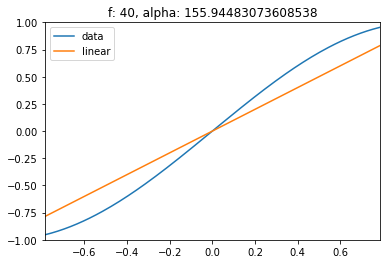

beta angle: 103.87638728077327 deg


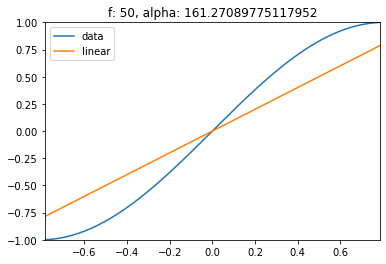

beta angle: 67.78537402220111 deg


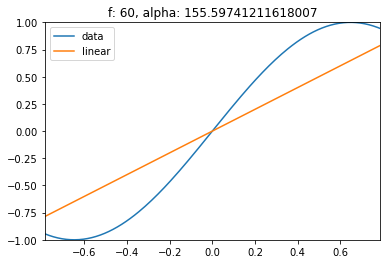

beta angle: 58.151631594327185 deg


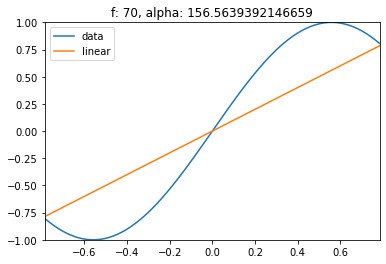

beta angle: 131.0244027472997 deg


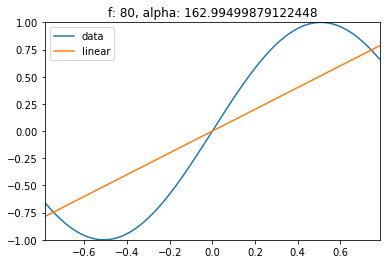

beta angle: 70.30900905444904 deg


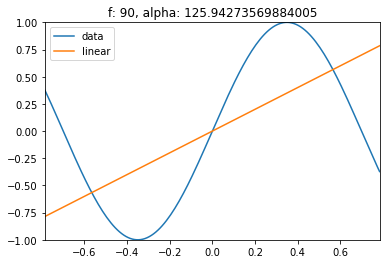

beta angle: 72.99745419110627 deg


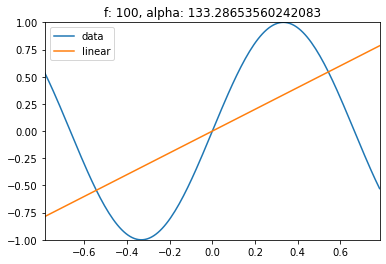

beta angle: 74.70923738308167 deg


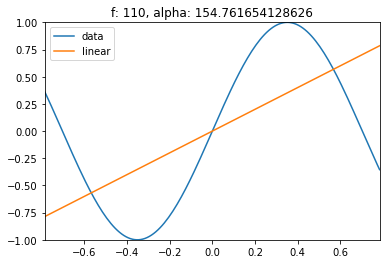

beta angle: 95.89201615366403 deg


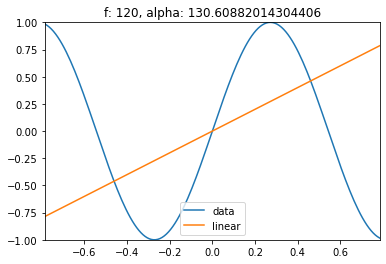

beta angle: 102.79538267867937 deg
trial: 7


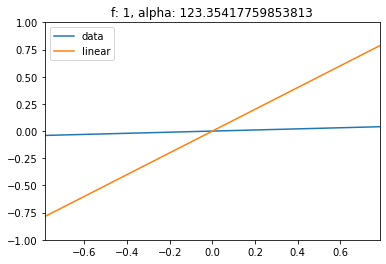

beta angle: 108.97566390603521 deg


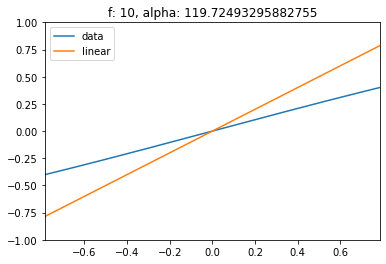

beta angle: 102.5923059226837 deg


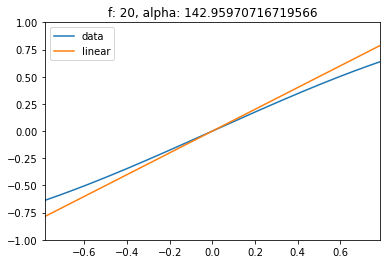

beta angle: 103.34827706350272 deg


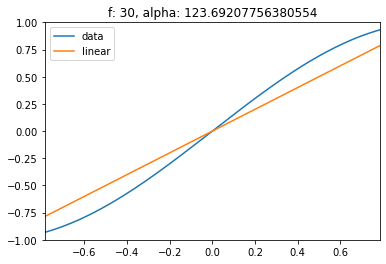

beta angle: 68.03577694353494 deg


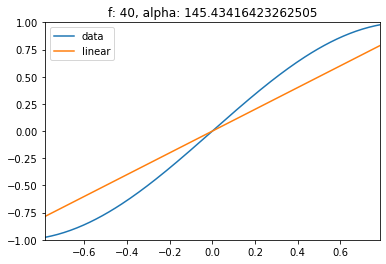

beta angle: 126.64409094516854 deg


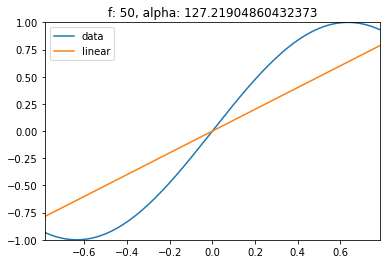

beta angle: 116.90975056150722 deg


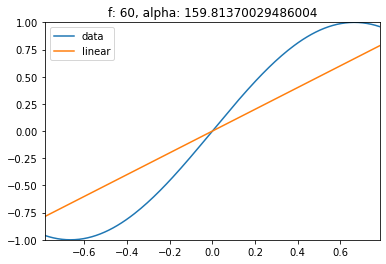

beta angle: 72.94424227890754 deg


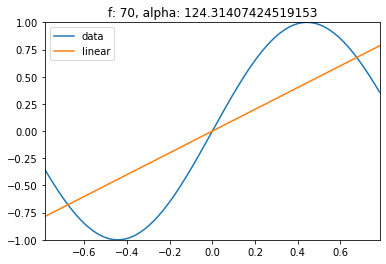

beta angle: 65.13375089293909 deg


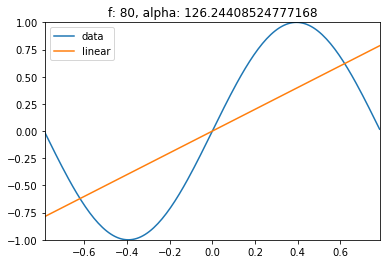

beta angle: 107.65839739107857 deg


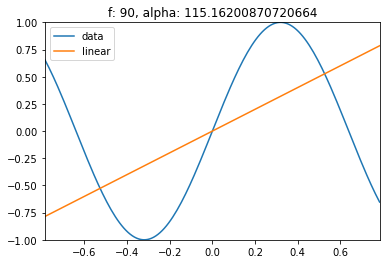

beta angle: 105.74476500196 deg


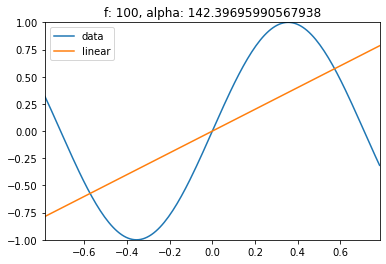

beta angle: 107.51658127846463 deg


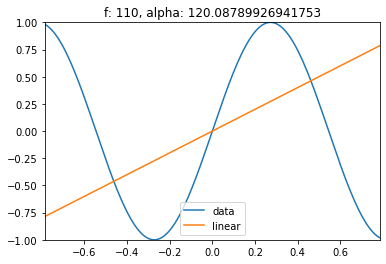

beta angle: 114.92410759655289 deg


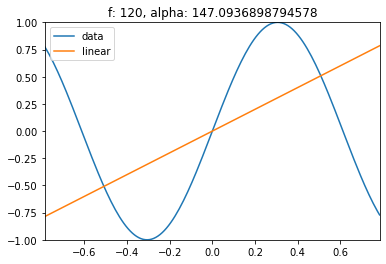

beta angle: 73.98064466331618 deg
trial: 8


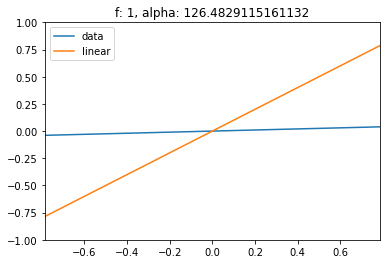

beta angle: 106.32828404925019 deg


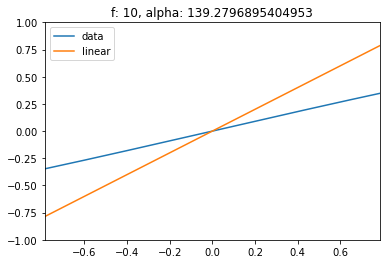

beta angle: 87.79220409423482 deg


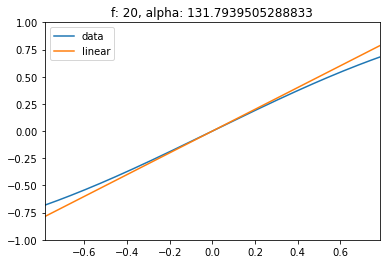

beta angle: 88.08304587191434 deg


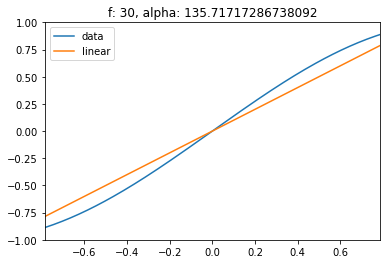

beta angle: 96.35148490754455 deg


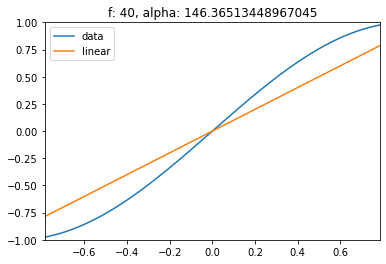

beta angle: 66.7024250674992 deg


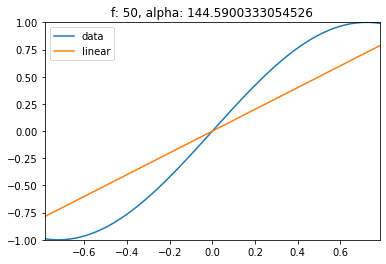

beta angle: 88.74053553112931 deg


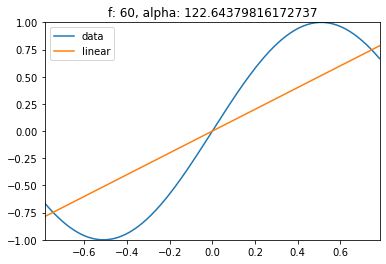

beta angle: 105.57887502754784 deg


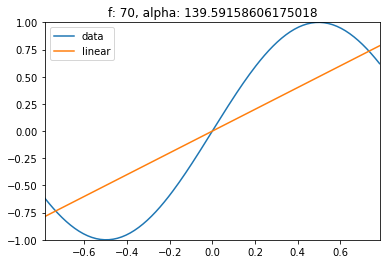

beta angle: 84.16300228933615 deg


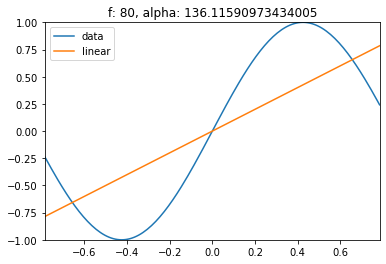

beta angle: 103.75025058777584 deg


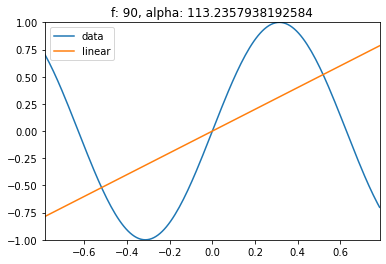

beta angle: 88.90534516701268 deg


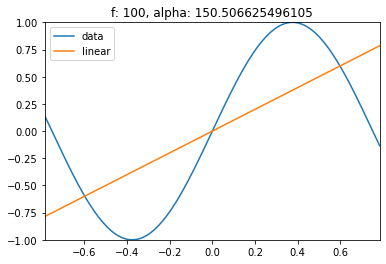

beta angle: 66.64008021711872 deg


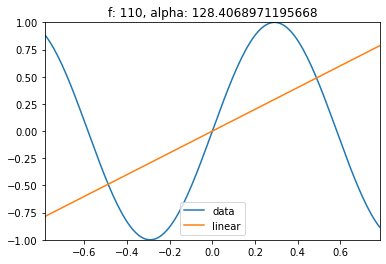

beta angle: 93.6802964470738 deg


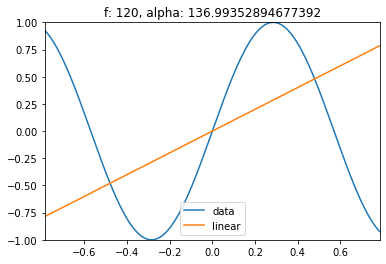

beta angle: 79.0617019421867 deg
trial: 9


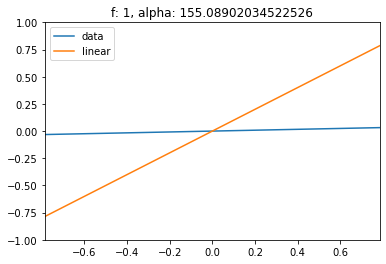

beta angle: 49.63930013366702 deg


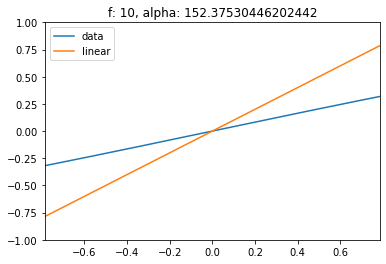

beta angle: 116.1927610678079 deg


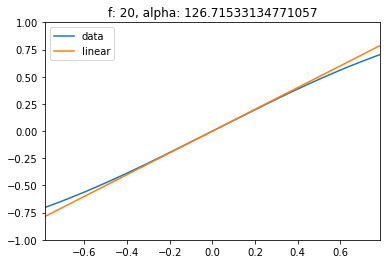

beta angle: 77.09146878834835 deg


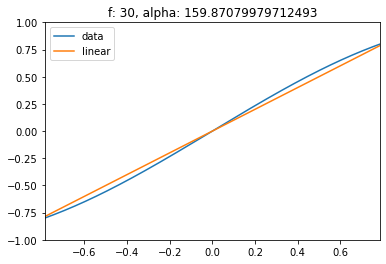

beta angle: 122.07280822275104 deg


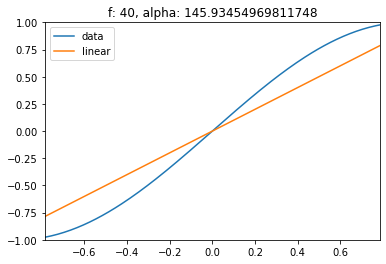

beta angle: 107.30862927542853 deg


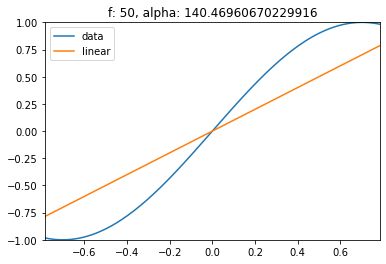

beta angle: 99.20407030290923 deg


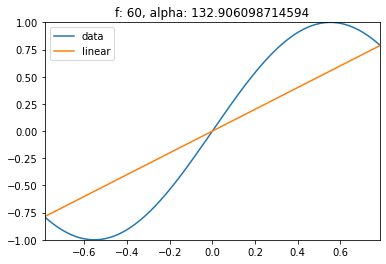

beta angle: 100.06308401250764 deg


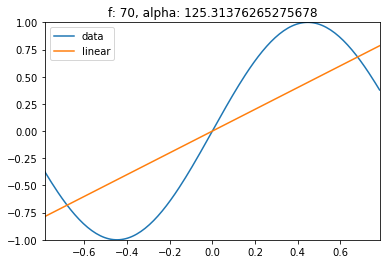

beta angle: 111.64665615885325 deg


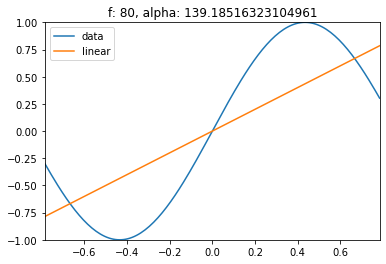

beta angle: 93.67990524849488 deg


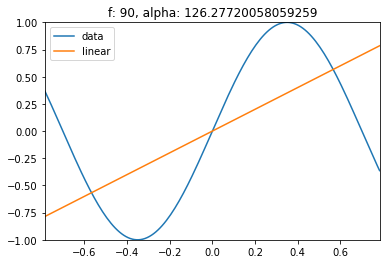

beta angle: 121.84347542927766 deg


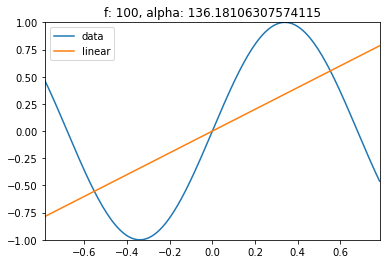

beta angle: 78.92875583124605 deg


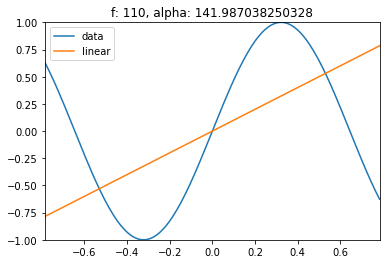

beta angle: 111.92526414066667 deg


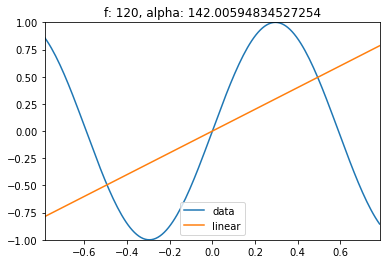

beta angle: 92.55556285850912 deg


In [24]:
N = 100 # sample
P = 5 # feature
b = 2 # number of dimensions identified from dimensionality reduction
trial_ct = 10
f_range = [1] + [i for i in range(10, 130, 10)] # degree of nonlinearity
beta_angles = np.zeros((trial_ct, len(f_range)))
for i in range(trial_ct):
    print(f"trial: {i}")
    for j, f in enumerate(f_range):
        X, beta, Y = generate_data(N, P, b, f)
        beta_hat, v_hat = dc.dca_grad_learn(X, Y, K=b, lr=1e-3, epsilon=1e-5)
        angle = beta_angle(beta_hat, beta)
        print(f"beta angle: {np.rad2deg(angle)} deg")
        beta_angles[i, j] = angle
with open("dca_grad_learn_betas.pickle", 'wb') as wf:
    pickle.dump(beta_angles, wf)

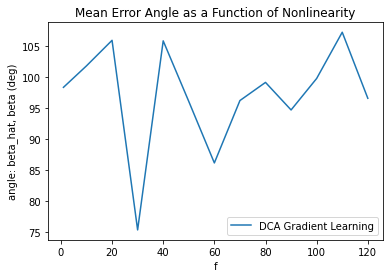

In [25]:
with open("dca_grad_learn_betas.pickle", 'rb') as rf:
    beta_angles = pickle.load(rf)
plt.plot(f_range, np.mean(np.rad2deg(beta_angles), axis=0))
plt.title("Mean Error Angle as a Function of Nonlinearity")
plt.xlabel("f")
plt.ylabel("angle: beta_hat, beta (deg)")
plt.legend(["DCA Gradient Learning"]);